# Projeto 1 "Online Retail"

Data Set disponibilizado pela UC Irvine Macbine Leaning Repository em https://archive.ics.uci.edu/dataset/352/online+retail

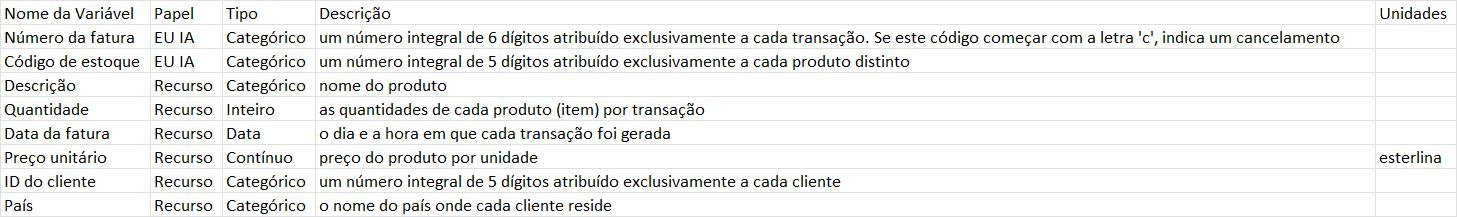

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importação de dados
file_path = 'C:\\Users\\geral\\Desktop\\JUPITER\\Online+Retail.xlsx'
df = pd.read_excel(file_path)

In [3]:
#Vizualiação tipos de dados
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#Vizualização data frame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#Criação do SalesTotal
df['SalesTotals'] = round(df['Quantity']*df['UnitPrice'],1)

14.8


In [6]:
#Percentual de NA's
((len(df) / df.count())-1).round(3)

InvoiceNo      0.000
StockCode      0.000
Description    0.003
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID     0.332
Country        0.000
SalesTotals    0.000
dtype: float64

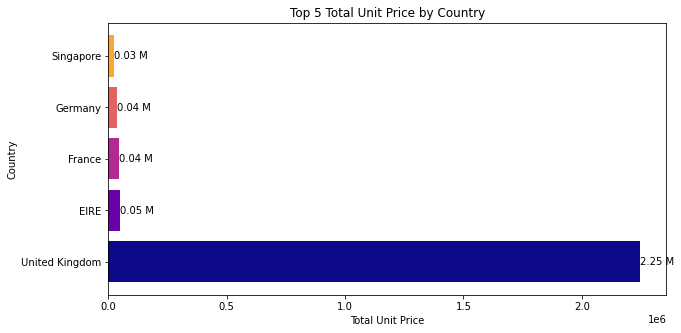

In [7]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['UnitPrice'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo

# Config
plt.xlabel('Total Unit Price')
plt.ylabel('Country')
plt.title('Top 5 Total Unit Price by Country')


plt.show()


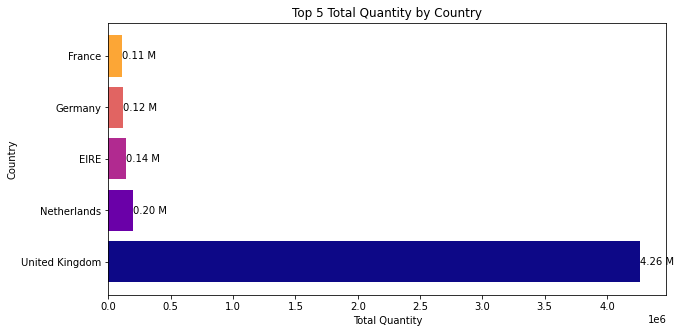

In [8]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['Quantity'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo
    
# Config
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.title('Top 5 Total Quantity by Country')


plt.show()

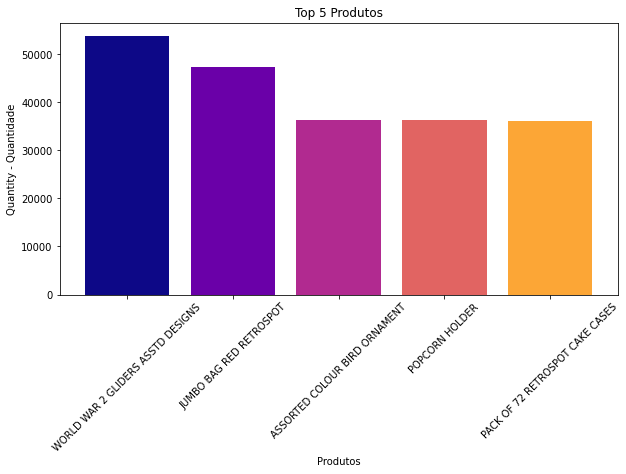

In [9]:
#Top 5 Produtos
plt.figure(figsize=(10, 5))
plt.bar(
    df.groupby('Description')['Quantity'].sum().nlargest(5).index,
    df.groupby('Description')['Quantity'].sum().nlargest(5).values,
    color=[plt.cm.plasma(i / 5) for i in range(5)],
    
   
)
# Config

plt.ylabel('Quantity - Quantidade')
plt.title('Top 5 Produtos')
plt.xlabel('Produtos')
plt.xticks(rotation=45)

plt.show()

In [10]:
#Quantidade 


In [11]:
#DataSet Filtrando 'c' Cancelados
df_cancelados = df[df['InvoiceNo'].str.startswith('C', na=False)]
print('Total de Cancelamentos: ',len(df_cancelados))

#DataSet Filtrado Cancelados
df1 = df[~df['InvoiceNo'].isin(df_cancelados['InvoiceNo'])]
print('Total de Vendas Sem cancelamentos: ',len(df1))

Total de Cancelamentos:  9288
Total de Vendas Sem cancelamentos:  532621


In [64]:
df[(df.CustomerID == 15498) & (df.Description == 'Manual')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotals
403580,C571639,M,Manual,-1,2011-10-18 12:01:00,120.58,15498.0,United Kingdom,-120.6
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.7


In [79]:
df[df.Quantity == 80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotals
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


In [80]:
df_cancelados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotals
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.5
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.6
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.8
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-7.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-7.0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.7
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.8
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.2
